# Assignment 3: Building a prediction model for Airbnb prices in Florence, Italy

### by Ataberk Atan & Barnabas Benyak

## 
All sample restriction steps are going to be typed with red. 

Data source: 04 January 2021 data from [Gabors Data Analysis](https://osf.io/b2ft9/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
## I. Data preparation

### a. Load dataset

## I. Data preparation

### a. Load dataset

In [2]:
df = pd.read_csv(
    "cs_bisnode_panel.csv",
    quotechar='"',
    delimiter=",",
    encoding="utf-8",
    dtype = "unicode"
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   comp_id               287829 non-null  object
 1   begin                 287829 non-null  object
 2   end                   287829 non-null  object
 3   COGS                  18257 non-null   object
 4   amort                 279789 non-null  object
 5   curr_assets           287698 non-null  object
 6   curr_liab             287698 non-null  object
 7   extra_exp             269300 non-null  object
 8   extra_inc             269300 non-null  object
 9   extra_profit_loss     270626 non-null  object
 10  finished_prod         17485 non-null   object
 11  fixed_assets          287698 non-null  object
 12  inc_bef_tax           280392 non-null  object
 13  intang_assets         287689 non-null  object
 14  inventories           287698 non-null  object
 15  liq_assets       

In [4]:
df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034,2005-01-01,2005-12-31,NaN,692.59259033203125,7266.66650390625,7574.07421875,0,0,0,...,mix,Domestic,5630,56,3,1,Central,1990-11-19,NaN,NaN
1,1001034,2006-01-01,2006-12-31,NaN,603.70367431640625,13122.22265625,12211.111328125,0,0,0,...,mix,Domestic,5630,56,3,1,Central,1990-11-19,NaN,NaN
2,1001034,2007-01-01,2007-12-31,NaN,425.9259338378906,8196.2958984375,7800,0,0,0,...,mix,Domestic,5630,56,3,1,Central,1990-11-19,NaN,NaN
3,1001034,2008-01-01,2008-12-31,NaN,300,8485.185546875,7781.4814453125,0,0,0,...,mix,Domestic,5630,56,3,1,Central,1990-11-19,NaN,NaN
4,1001034,2009-01-01,2009-12-31,NaN,207.40740966796875,5137.037109375,15300,0,0,0,...,mix,Domestic,5630,56,3,1,Central,1990-11-19,NaN,0.0833333358168602


In [5]:
np.mean(df['D'].isna())

1.0

Let's change the data type wherever it absolutely must be changed

In [6]:
df.infer_objects().dtypes

comp_id                  object
begin                    object
end                      object
COGS                     object
amort                    object
curr_assets              object
curr_liab                object
extra_exp                object
extra_inc                object
extra_profit_loss        object
finished_prod            object
fixed_assets             object
inc_bef_tax              object
intang_assets            object
inventories              object
liq_assets               object
material_exp             object
net_dom_sales            object
net_exp_sales            object
personnel_exp            object
profit_loss_year         object
sales                    object
share_eq                 object
subscribed_cap           object
tang_assets              object
wages                    object
D                       float64
balsheet_flag            object
balsheet_length          object
balsheet_notfullyear     object
year                     object
founded_

In [7]:
# List of numeric euro amount variables according to the variable list:

numeric_euros = ["COGS",
"amort",
"curr_assets",
"curr_liab",
"extra_exp",
"extra_inc",
"extra_profit_loss",
"finished_prod",
"fixed_assets",
"inc_bef_tax",
"intang_assets",
"inventories",
"liq_assets",
"material_exp",
"net_dom_sales",
"net_exp_sales",
"personnel_exp",
"profit_loss_year",
"sales",
"share_eq",
"subscribed_cap",
"tang_assets",
"wages"
]

In [8]:
numeric_others = ["ceo_count",
"foreign",
"female",
"birth_year",
"inoffice_days",
"labor_avg",
"balsheet_length"
]

In [9]:
categoricals = ["gender",
"origin",
"nace_main",
"ind2",
"ind",
"urban_m",
"region_m",
]

In [10]:
# Convert selected columns to numeric
df[numeric_euros] = df[numeric_euros].apply(pd.to_numeric)

# Print the updated DataFrame
print(df.dtypes)


comp_id                  object
begin                    object
end                      object
COGS                    float64
amort                   float64
curr_assets             float64
curr_liab               float64
extra_exp               float64
extra_inc               float64
extra_profit_loss       float64
finished_prod           float64
fixed_assets            float64
inc_bef_tax             float64
intang_assets           float64
inventories             float64
liq_assets              float64
material_exp            float64
net_dom_sales           float64
net_exp_sales           float64
personnel_exp           float64
profit_loss_year        float64
sales                   float64
share_eq                float64
subscribed_cap          float64
tang_assets             float64
wages                   float64
D                        object
balsheet_flag            object
balsheet_length          object
balsheet_notfullyear     object
year                     object
founded_

In [11]:
# Convert selected columns to numeric
df[numeric_others] = df[numeric_others].apply(pd.to_numeric)

# Print the updated DataFrame
print(df.dtypes)

comp_id                  object
begin                    object
end                      object
COGS                    float64
amort                   float64
curr_assets             float64
curr_liab               float64
extra_exp               float64
extra_inc               float64
extra_profit_loss       float64
finished_prod           float64
fixed_assets            float64
inc_bef_tax             float64
intang_assets           float64
inventories             float64
liq_assets              float64
material_exp            float64
net_dom_sales           float64
net_exp_sales           float64
personnel_exp           float64
profit_loss_year        float64
sales                   float64
share_eq                float64
subscribed_cap          float64
tang_assets             float64
wages                   float64
D                        object
balsheet_flag            object
balsheet_length           int64
balsheet_notfullyear     object
year                     object
founded_

In [12]:
# Convert selected columns to numeric
df[categoricals] = df[categoricals].astype('category')

# Print the updated DataFrame
print(df.dtypes)

comp_id                   object
begin                     object
end                       object
COGS                     float64
amort                    float64
curr_assets              float64
curr_liab                float64
extra_exp                float64
extra_inc                float64
extra_profit_loss        float64
finished_prod            float64
fixed_assets             float64
inc_bef_tax              float64
intang_assets            float64
inventories              float64
liq_assets               float64
material_exp             float64
net_dom_sales            float64
net_exp_sales            float64
personnel_exp            float64
profit_loss_year         float64
sales                    float64
share_eq                 float64
subscribed_cap           float64
tang_assets              float64
wages                    float64
D                         object
balsheet_flag             object
balsheet_length            int64
balsheet_notfullyear      object
year      

In [13]:
binaries = ["balsheet_flag",
"balsheet_notfullyear"
]

df[binaries].nunique()

balsheet_flag           2
balsheet_notfullyear    2
dtype: int64

In [14]:
df[binaries] = df[binaries].astype(bool)

print(df.dtypes)

comp_id                   object
begin                     object
end                       object
COGS                     float64
amort                    float64
curr_assets              float64
curr_liab                float64
extra_exp                float64
extra_inc                float64
extra_profit_loss        float64
finished_prod            float64
fixed_assets             float64
inc_bef_tax              float64
intang_assets            float64
inventories              float64
liq_assets               float64
material_exp             float64
net_dom_sales            float64
net_exp_sales            float64
personnel_exp            float64
profit_loss_year         float64
sales                    float64
share_eq                 float64
subscribed_cap           float64
tang_assets              float64
wages                    float64
D                         object
balsheet_flag               bool
balsheet_length            int64
balsheet_notfullyear        bool
year      

In [15]:
date_years = ["year",
"founded_year",
"exit_year"
]

In [16]:
df[date_years][df['exit_year'].isna()]

,year,founded_year,exit_year
0,2005,1990,NaN
1,2006,1990,NaN
2,2007,1990,NaN
3,2008,1990,NaN
4,2009,1990,NaN
...,...,...,...
287824,2011,1990,NaN
287825,2012,1990,NaN
287826,2013,NaN,NaN
287827,2014,1990,NaN


In [17]:
date_dates = ["founded_date",
"exit_date",
"begin",
"end"]

In [18]:
df[date_dates] = df[date_dates].apply(pd.to_datetime)

print(df.dtypes)


comp_id                         object
begin                   datetime64[ns]
end                     datetime64[ns]
COGS                           float64
amort                          float64
curr_assets                    float64
curr_liab                      float64
extra_exp                      float64
extra_inc                      float64
extra_profit_loss              float64
finished_prod                  float64
fixed_assets                   float64
inc_bef_tax                    float64
intang_assets                  float64
inventories                    float64
liq_assets                     float64
material_exp                   float64
net_dom_sales                  float64
net_exp_sales                  float64
personnel_exp                  float64
profit_loss_year               float64
sales                          float64
share_eq                       float64
subscribed_cap                 float64
tang_assets                    float64
wages                    

## what is '2e3' supposed to be???
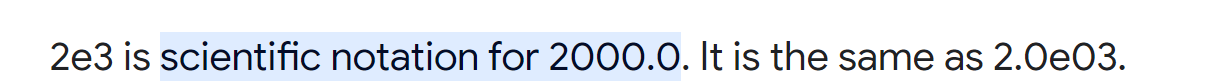

In [19]:
df[date_years][df["founded_year"] == '2e3']


,year,founded_year,exit_year
149,2005,2e3,2012
150,2006,2e3,2012
151,2007,2e3,2012
152,2008,2e3,2012
153,2009,2e3,2012
...,...,...,...
287751,2011,2e3,NaN
287752,2012,2e3,NaN
287753,2013,2e3,NaN
287754,2014,2e3,NaN


In [20]:
df[date_years] = df[date_years].apply(lambda x: 2000 if 2e3 in x else x)

In [21]:
df[date_years][df["founded_year"] == '2e3']

,year,founded_year,exit_year


In [22]:
df[date_years] = df[date_years].apply(lambda x: pd.to_datetime(x, format='%Y'))


In [23]:
print(df.dtypes)


comp_id                         object
begin                   datetime64[ns]
end                     datetime64[ns]
COGS                           float64
amort                          float64
curr_assets                    float64
curr_liab                      float64
extra_exp                      float64
extra_inc                      float64
extra_profit_loss              float64
finished_prod                  float64
fixed_assets                   float64
inc_bef_tax                    float64
intang_assets                  float64
inventories                    float64
liq_assets                     float64
material_exp                   float64
net_dom_sales                  float64
net_exp_sales                  float64
personnel_exp                  float64
profit_loss_year               float64
sales                          float64
share_eq                       float64
subscribed_cap                 float64
tang_assets                    float64
wages                    

### b. Label engineering, primary sample restrictions

design the target (fast growth), it can be measured in any way you like over one (2013 vs 2012) or two years (2014 vs 2012)

You need to argue for your choice, discussing a few alternatives.

we can look at growth in asset size, sales etc.



In [24]:
df['year'].value_counts()

2000-01-01    287829
Name: year, dtype: int64